# Health Insurance Cost Project

## Introduction
It's crucial to have health insurance for a family because, especially in the private sector, medical care is expensive. Being hospitalised can  ruin your finances.  Paying a small annual premium would ease the concern in the situation of medical emergencies and help you to avoid all of this.
A significant public health concern is the rising cost of healthcare. Therefore, it is crucial to accurately forecast future expenses and understand what causes rises in health care spending.

Predicting correct health insurance cost is very important in today's world. Therefore, here we are applying various machine learning algorithms to predict the correct cost of health insurance.

### Aim: 
- Performing EDA and necessary feature engineering step to clean and modify the data. 
- Comparing different machine learning models for prediction of health insurance cost.

In [713]:
#Importing the libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [714]:
#Importing the data.
original_HIC_1=pd.read_excel("Health_insurance_cost.xlsx")

# Exploratory data analysis

In [715]:
original_HIC_1.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [716]:
original_HIC_1.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [717]:
original_HIC_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [718]:
original_HIC_1.shape

(1338, 7)

In [719]:
original_HIC_1.nunique()

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1335
dtype: int64

In [720]:
original_HIC_1.duplicated().sum()

1

1 duplicate record found. We can remove it

In [721]:
original_HIC_1.drop_duplicates(inplace=True)

In [722]:
# after removing the duplicate records
original_HIC_1.shape

(1337, 7)

In [723]:
original_HIC_1.describe()

,age,BMI,Children,health_insurance_price
count,1309.000000,1314.000000,1337.000000,1335.000000
mean,39.181818,30.638253,1.095737,13277.238554
std,14.049681,6.112628,1.205571,12113.150034
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.205000,0.000000,4746.698450
50%,39.000000,30.305000,1.000000,9386.161300
75%,51.000000,34.580000,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


In [724]:
original_HIC_1.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [725]:
#dropping the null values from the target column as we do not want to impute it.
original_HIC_1.dropna(subset=['health_insurance_price'], inplace= True)

There are multiple missing values in age,BMI,heath_insurance_cost column.

In [726]:
#Checking null record in percentages
original_HIC_1.isnull().sum()/ len(original_HIC_1) * 100

age                       2.097378
gender                    0.000000
BMI                       1.722846
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.000000
dtype: float64

In [727]:
original_HIC_1.skew(numeric_only=True)

age                       0.056787
BMI                       0.297727
Children                  0.938512
health_insurance_price    1.516765
dtype: float64

In [728]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
original_HIC_1[['gender', 'smoking_status','location']] = Or_enc.fit_transform(original_HIC_1[['gender', 'smoking_status','location']])

In [729]:
original_HIC_1

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,NaN,0,1.0,3.0,16884.92400
1,18.0,1.0,33.770,1,0.0,2.0,1725.55230
2,28.0,1.0,33.000,3,0.0,2.0,4449.46200
3,33.0,1.0,22.705,0,0.0,1.0,21984.47061
4,32.0,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1.0,30.970,3,0.0,1.0,10600.54830
1334,18.0,0.0,31.920,0,0.0,0.0,2205.98080
1335,18.0,0.0,36.850,0,0.0,2.0,1629.83350
1336,21.0,0.0,25.800,0,0.0,3.0,2007.94500


In [730]:
# To avoid data leakage from outcome variable splitting the data set
Independent = original_HIC_1.drop('health_insurance_price',axis=1)
Independent.head()

,age,gender,BMI,Children,smoking_status,location
0,19.0,0.0,NaN,0,1.0,3.0
1,18.0,1.0,33.770,1,0.0,2.0
2,28.0,1.0,33.000,3,0.0,2.0
3,33.0,1.0,22.705,0,0.0,1.0
4,32.0,1.0,28.880,0,0.0,1.0


In [731]:
Dependent = original_HIC_1['health_insurance_price'] # target variable
Dependent.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

In [732]:
# Imputation using KNN
from fancyimpute import KNN
knn_imputer = KNN()
Independent_knn = Independent.copy(deep=True)
Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)

Imputing row 1/1335 with 1 missing, elapsed time: 0.273
Imputing row 101/1335 with 0 missing, elapsed time: 0.273
Imputing row 201/1335 with 0 missing, elapsed time: 0.273
Imputing row 301/1335 with 0 missing, elapsed time: 0.273
Imputing row 401/1335 with 0 missing, elapsed time: 0.273
Imputing row 501/1335 with 0 missing, elapsed time: 0.273
Imputing row 601/1335 with 0 missing, elapsed time: 0.273
Imputing row 701/1335 with 0 missing, elapsed time: 0.276
Imputing row 801/1335 with 0 missing, elapsed time: 0.276
Imputing row 901/1335 with 0 missing, elapsed time: 0.276
Imputing row 1001/1335 with 0 missing, elapsed time: 0.278
Imputing row 1101/1335 with 0 missing, elapsed time: 0.278
Imputing row 1201/1335 with 0 missing, elapsed time: 0.278
Imputing row 1301/1335 with 0 missing, elapsed time: 0.278


C:\Users\prate\AppData\Local\Temp\ipykernel_15960\2857701596.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)


In [733]:
# Imputation using MICE
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
Independent_MICE = Independent.copy(deep=True)
Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)

C:\Users\prate\AppData\Local\Temp\ipykernel_15960\3652785777.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Independent_MICE.iloc[:, :] = MICE_imputer.fit_transform(Independent_MICE)


In [734]:
# substituting missing values in age column with mean value  of age and again checking the distribution.
mean_age=original_HIC_1.age.fillna(original_HIC_1.age.mean())
mean_BMI=original_HIC_1.BMI.fillna(original_HIC_1.BMI.mean())

<AxesSubplot: xlabel='age', ylabel='Density'>

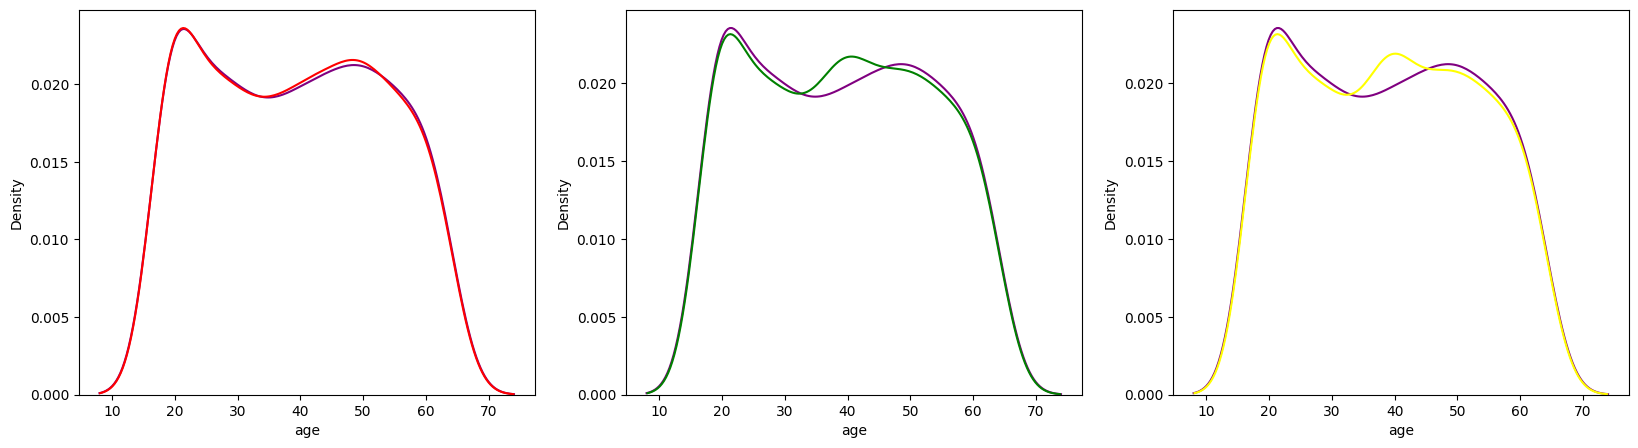

In [735]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
sns.kdeplot(original_HIC_1.age,color="purple",ax=ax[0])
sns.kdeplot(Independent_knn['age'], color="red",ax=ax[0])
sns.kdeplot(original_HIC_1.age,color="purple",ax=ax[1])
sns.kdeplot(Independent_MICE['age'], color="green",ax=ax[1])
sns.kdeplot(original_HIC_1.age,color="purple",ax=ax[2])
sns.kdeplot(mean_age, color="yellow",ax=ax[2])

<AxesSubplot: xlabel='BMI', ylabel='Density'>

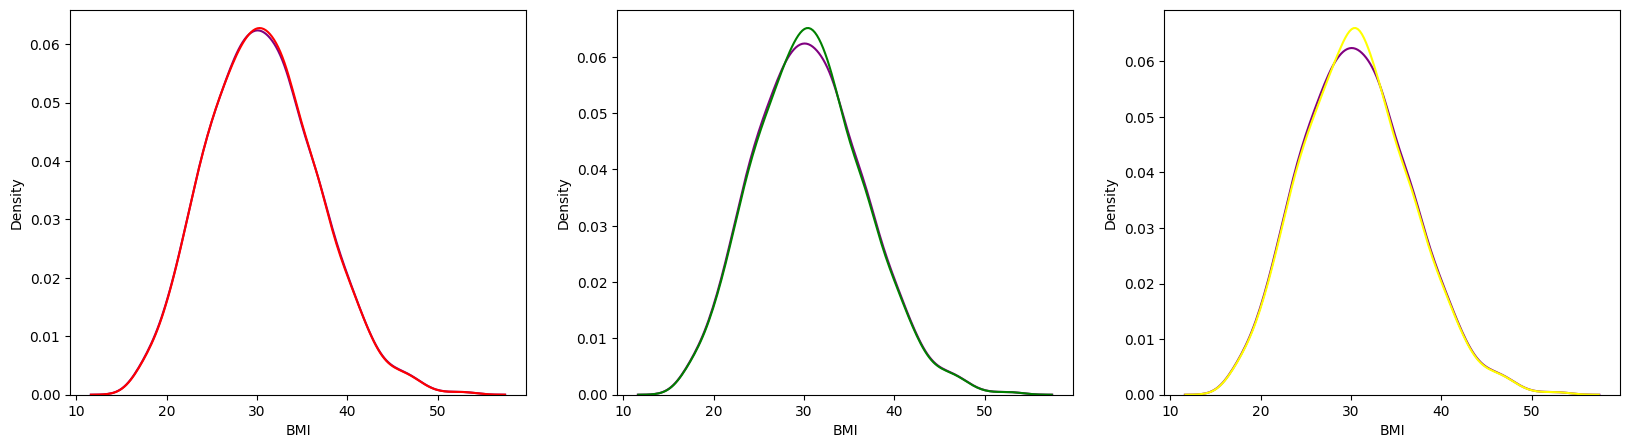

In [736]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
sns.kdeplot(original_HIC_1.BMI,color="purple",ax=ax[0])
sns.kdeplot(Independent_knn['BMI'], color="red",ax=ax[0])
sns.kdeplot(original_HIC_1.BMI,color="purple",ax=ax[1])
sns.kdeplot(Independent_MICE['BMI'], color="green",ax=ax[1])
sns.kdeplot(original_HIC_1.BMI,color="purple",ax=ax[2])
sns.kdeplot(mean_BMI, color="yellow",ax=ax[2])

Approximately, KNN and MICE graphs overlap each other which shows that their is no major change in the distribution of data after filling the missing values, so I am applying KNN impution.

In [737]:
original_HIC = pd.concat([Independent_knn, Dependent], axis=1) # concatenating independent and dependent variable
original_HIC.head(10)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0.0,26.19999,0.0,1.0,3.0,16884.92400
1,18.0,1.0,33.77000,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.00000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.70500,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.88000,0.0,0.0,1.0,3866.85520
5,31.0,0.0,25.74000,0.0,0.0,2.0,3756.62160
6,46.0,0.0,33.44000,1.0,0.0,2.0,8240.58960
7,37.0,0.0,27.74000,3.0,0.0,1.0,7281.50560
8,37.0,1.0,29.83000,2.0,0.0,0.0,6406.41070
9,60.0,0.0,25.84000,0.0,0.0,1.0,28923.13692


In [738]:
original_HIC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1335 non-null   float64
 1   gender                  1335 non-null   float64
 2   BMI                     1335 non-null   float64
 3   Children                1335 non-null   float64
 4   smoking_status          1335 non-null   float64
 5   location                1335 non-null   float64
 6   health_insurance_price  1335 non-null   float64
dtypes: float64(7)
memory usage: 83.4 KB


In [739]:
#Checking null record in percentages after dealing with the missing records.
original_HIC.isnull().sum()/ len(original_HIC) * 100

age                       0.0
gender                    0.0
BMI                       0.0
Children                  0.0
smoking_status            0.0
location                  0.0
health_insurance_price    0.0
dtype: float64

Now, we can proceed further.

<AxesSubplot: >

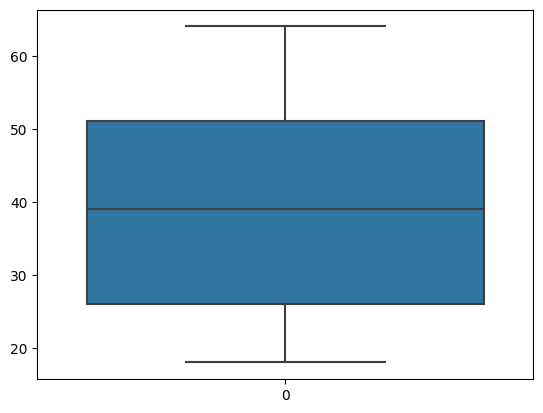

In [740]:
sns.boxplot(original_HIC.age)

<AxesSubplot: >

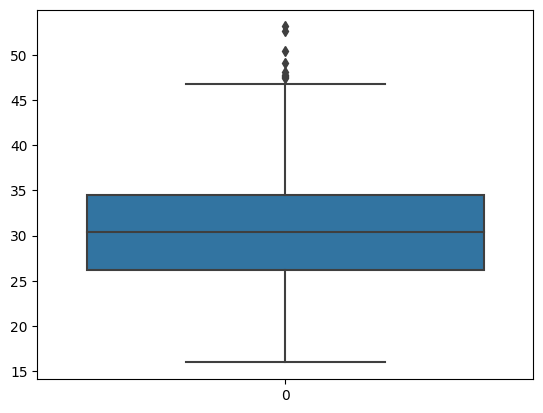

In [741]:
sns.boxplot(original_HIC.BMI)

In [742]:
q1=original_HIC.BMI.quantile(0.25)
q3=original_HIC.BMI.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
original_HIC.BMI=np.where(original_HIC.BMI>upper_bound,upper_bound,original_HIC.BMI)
#original_HIC=original_HIC[(original_HIC.BMI>lower_bound) & (original_HIC.BMI<upper_bound)]

<AxesSubplot: >

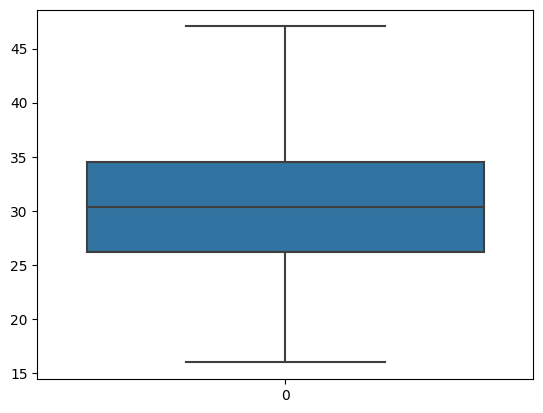

In [743]:
sns.boxplot(original_HIC.BMI)

<AxesSubplot: xlabel='BMI', ylabel='Density'>

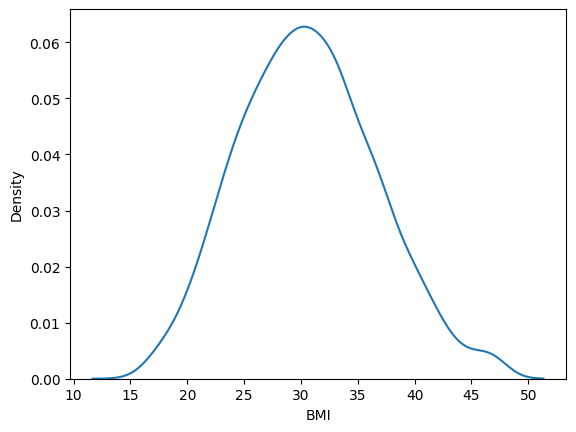

In [744]:
sns.kdeplot(original_HIC.BMI)

After removing the outliers from BMI column, Checking where the outliers change the distribution of BMI or not. Found that, no such change in the distribution.

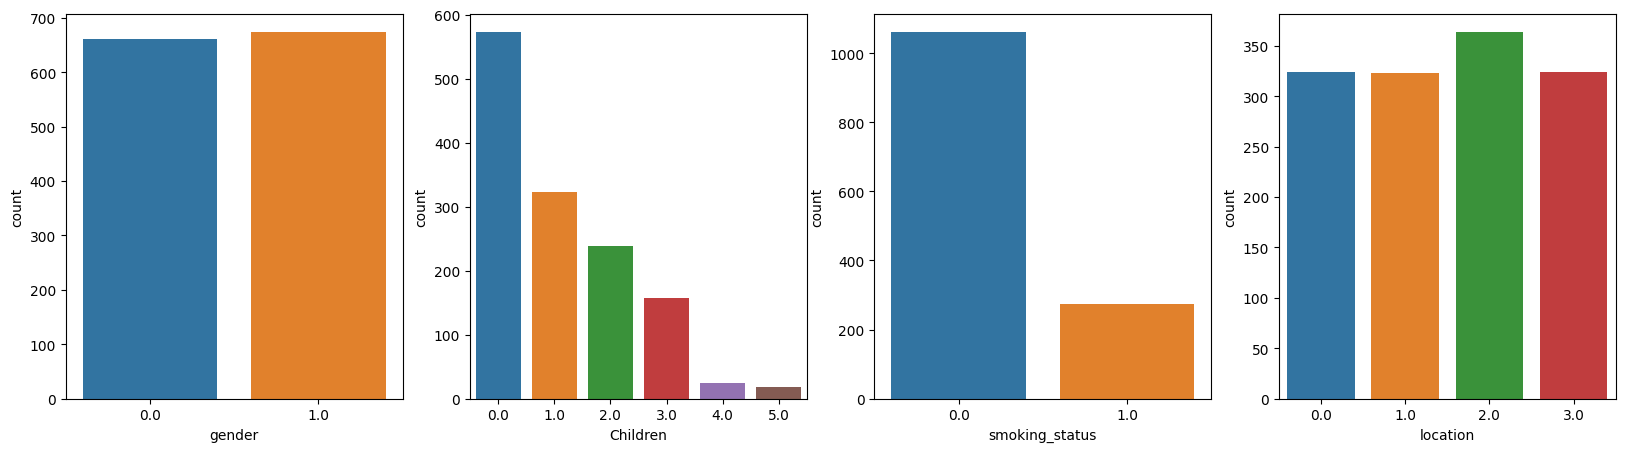

In [745]:
fig, ax = plt.subplots(1,4,figsize=(20, 5))
sns.countplot(x='gender', data=original_HIC,ax=ax[0])
sns.countplot(x='Children', data=original_HIC,ax=ax[1])
sns.countplot(x='smoking_status', data=original_HIC,ax=ax[2])
sns.countplot(x='location', data=original_HIC,ax=ax[3])
plt.show()

<AxesSubplot: xlabel='BMI', ylabel='health_insurance_price'>

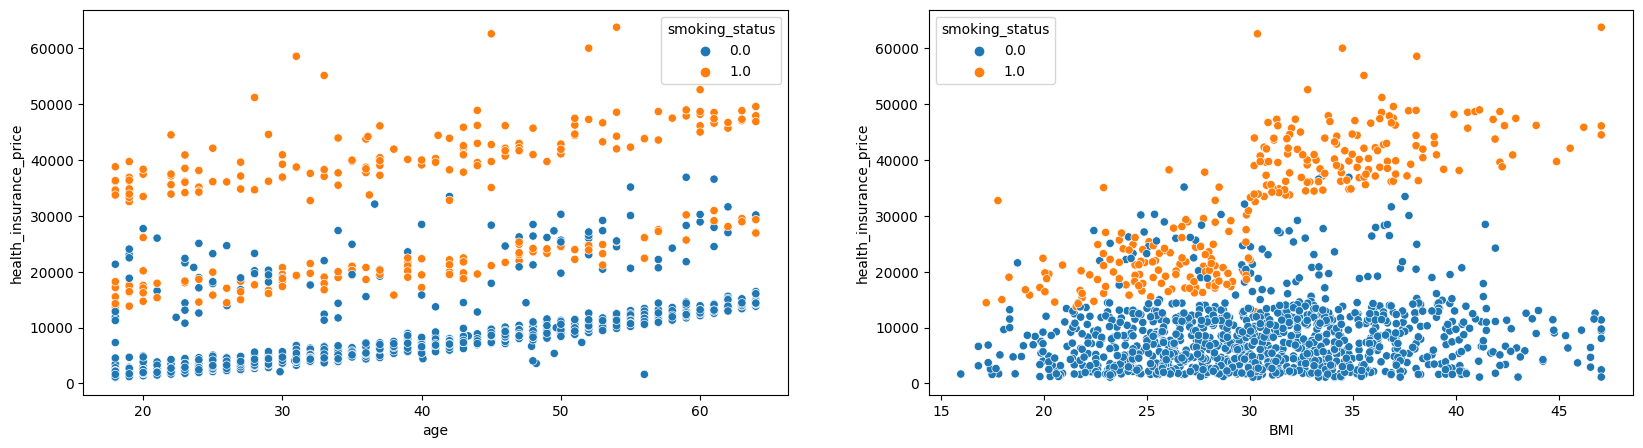

In [746]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.scatterplot(original_HIC,x='age',y='health_insurance_price',hue='smoking_status',ax=ax[0])
sns.scatterplot(original_HIC,x='BMI',y='health_insurance_price',hue='smoking_status',ax=ax[1])

Text(0.5, 1.0, 'Correlation Matrix')

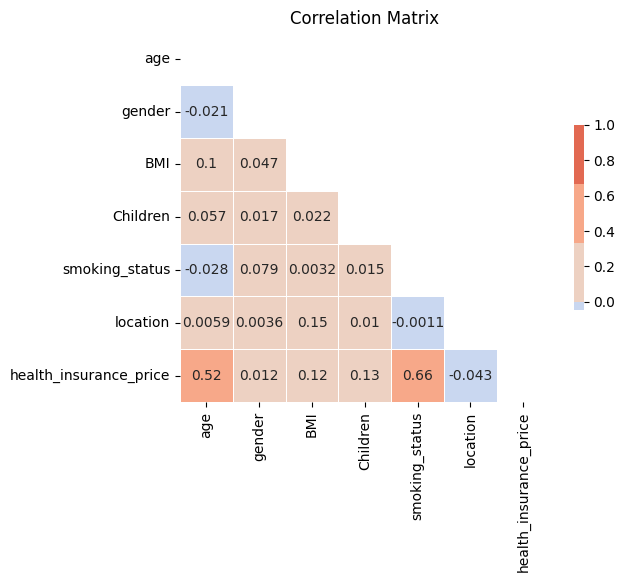

In [747]:
mask = np.triu(np.ones_like(original_HIC.corr('spearman'), dtype=bool))
sns.heatmap(original_HIC.corr('spearman'),mask=mask,cmap=sns.color_palette('coolwarm'), vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Correlation Matrix')

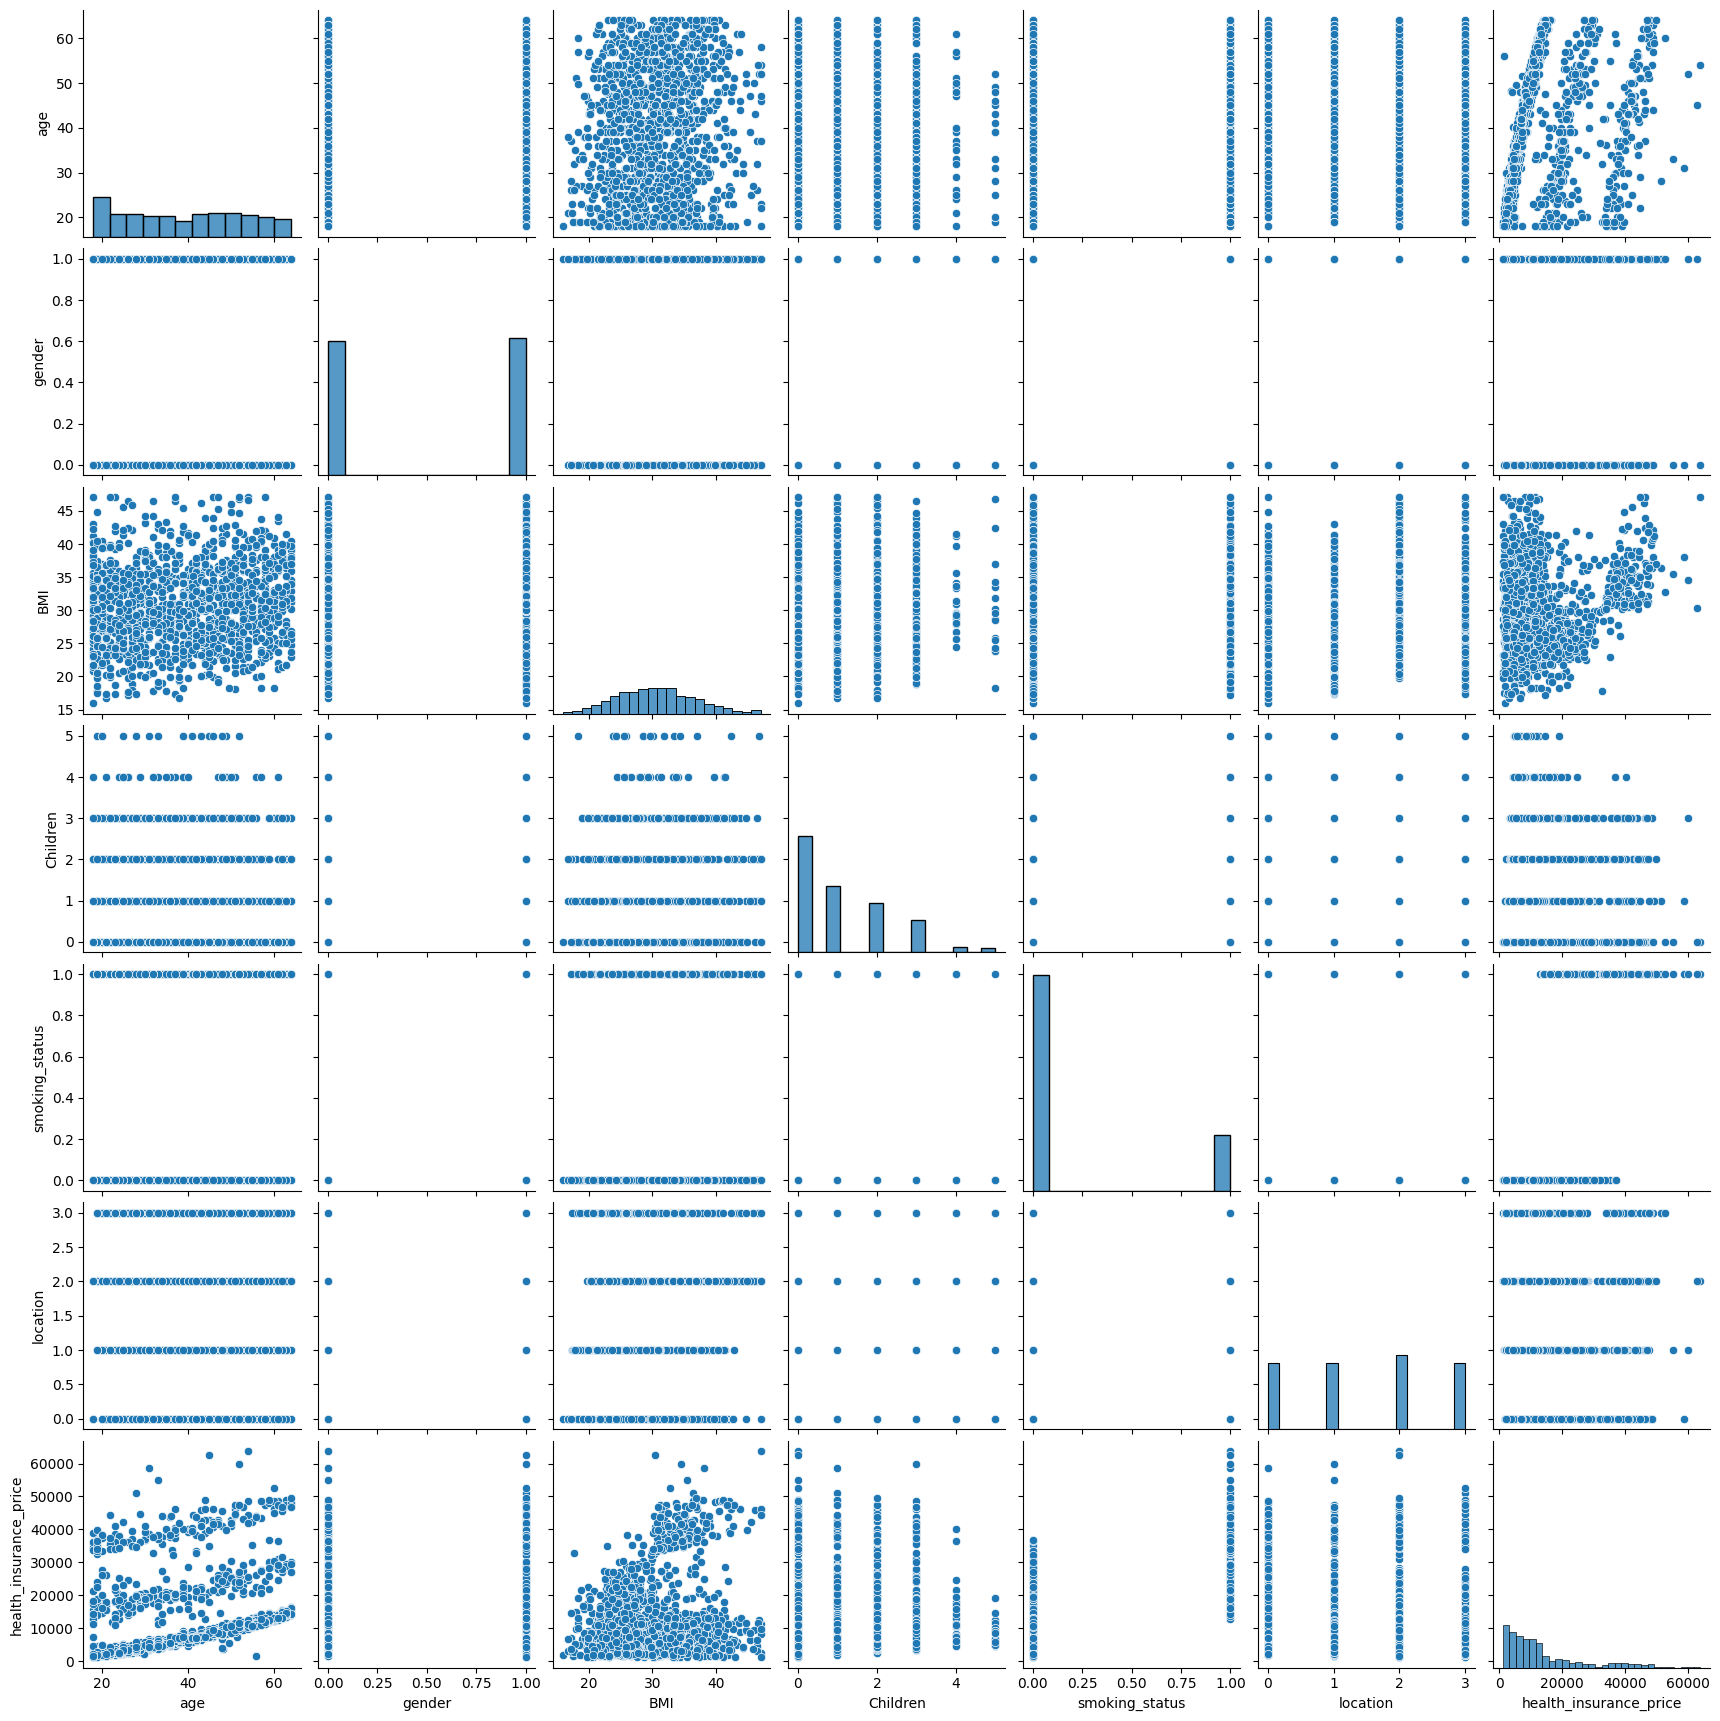

In [748]:
sns.pairplot(original_HIC)

[0.12765527 0.01027877 0.19352925 0.02601399 0.62053929 0.02198343]


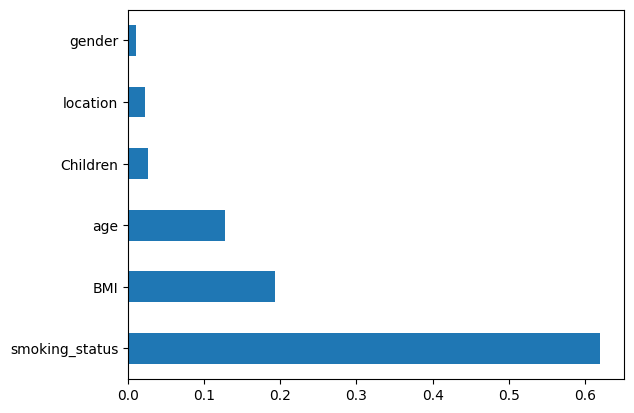

In [749]:
X = original_HIC.iloc[:,0:6]  #independent columns
y = original_HIC.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [750]:
# apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = original_HIC.iloc[:,0:6]  #independent columns
y = original_HIC.iloc[:,-1]
bestfeatures = SelectKBest(score_func=f_regression, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score')) 

            Specs        Score
4  smoking_status  2172.226907
0             age   121.322307
2             BMI    53.309361
3        Children     5.988029
1          gender     4.713084
5        location     0.040372


In [751]:
# droping the gender and location columns from the dataset as they are not related to health insurance price.
original_HIC=original_HIC.drop(columns=['gender','location'])

### Encoding the categorical columns for machine learning algorithm. As the dataset contains nominal columns, so we are using ONE HOT ENCODING (Dummy variables) technique to convert them into numerical columns

In [752]:
original_HIC=pd.get_dummies(original_HIC, columns=['smoking_status'], drop_first=True)
original_HIC

,age,BMI,Children,health_insurance_price,smoking_status_1.0
0,19.0,26.19999,0.0,16884.92400,1
1,18.0,33.77000,1.0,1725.55230,0
2,28.0,33.00000,3.0,4449.46200,0
3,33.0,22.70500,0.0,21984.47061,0
4,32.0,28.88000,0.0,3866.85520,0
...,...,...,...,...,...
1333,50.0,30.97000,3.0,10600.54830,0
1334,18.0,31.92000,0.0,2205.98080,0
1335,18.0,36.85000,0.0,1629.83350,0
1336,21.0,25.80000,0.0,2007.94500,0


## Preparing Training , Testing data for modeling

In [753]:
# Features dataframe
X = original_HIC.drop('health_insurance_price',axis = 1)

# Target column
y = original_HIC.health_insurance_price

X.shape,y.shape

((1335, 4), (1335,))

In [754]:
# scaling Age and BMI columns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# converting back into dataframe format
X_train_norm=pd.DataFrame(X_train_norm,columns=X_train.columns)
X_test_norm=pd.DataFrame(X_test_norm,columns=X_test.columns)
X_train_norm
X_test_norm


,age,BMI,Children,smoking_status_1.0
0,0.434783,0.103688,0.2,0.0
1,0.760870,0.373243,0.6,0.0
2,0.391304,0.810643,0.6,0.0
3,0.260870,0.488010,0.6,0.0
4,0.152174,0.219944,0.0,0.0
...,...,...,...,...
262,0.739130,0.571688,0.0,0.0
263,0.108696,0.018852,0.2,0.0
264,0.173913,0.982801,0.2,0.0
265,0.586957,0.538611,0.0,0.0


# Modelling

In [755]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score,mean_absolute_error,confusion_matrix

In [756]:
# We will Save all the accuracy matrices in a seperate dataset to visualise it later for comparison.
models = []
model_mae = []
model_mse = []
model_rmse = []
model_r2=[]

LinearRegression
mae = 4440.502539347987
mse = 38742625.816656396
Rmse = 6224.357462152731
r2 = 0.7416026353177207
KNN
mae = 3060.8275764644195
mse = 27736020.504346054
Rmse = 5266.499834268112
r2 = 0.8150121615655836
Decision Tree
mae = 3351.9436364044946
mse = 44088889.83425039
Rmse = 6639.946523448091
r2 = 0.7059452552635258
Random Forest
mae = 3101.5993138812873
mse = 28016105.829024766
Rmse = 5293.0242611407675
r2 = 0.8131441077551461
SVM
mae = 8350.282486660204
mse = 165082760.56986496
Rmse = 12848.453625626118
r2 = -0.10103405194052506


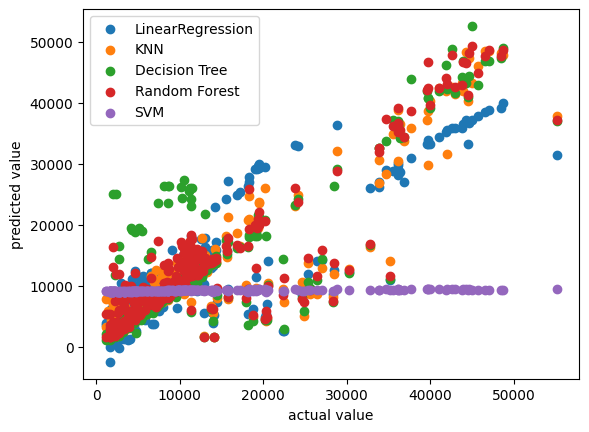

In [757]:

lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
svm=SVR()

model=[lr,knn,dt,rf,svm]

model_names = ['LinearRegression','KNN','Decision Tree','Random Forest','SVM']

for i in range(len(model)):    
    model[i].fit(X_train_norm, y_train)
    y_pred = model[i].predict(X_test_norm)
    print(model_names[i])
    print('mae =',mean_absolute_error(y_test, y_pred))
    print('mse =',mean_squared_error(y_test, y_pred))
    print('Rmse =',np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2 =',r2_score(y_test, y_pred))
    plt.scatter(y_test,y_pred)
    plt.legend(['LinearRegression','KNN','Decision Tree','Random Forest','SVM'])
    plt.xlabel('actual value')
    plt.ylabel('predicted value')
    print("================================================================")

# Now we will use gridsearchcv to enhance to models one by one

In [758]:
from sklearn.model_selection import GridSearchCV

In [759]:
# We will Save all the accuracy matrices in a seperate dataset to visualise it later for comparison.
models = []
model_mae = []
model_mse = []
model_rmse = []
model_r2=[]

In [760]:
model=[lr,knn,dt,rf,svm]

lrp= {'n_jobs': [3,5,7,9,11,None],'fit_intercept':[True, False],'positive': [False, True],'copy_X': [True,False]}
knnp = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':np.arange(1,100,2),'weights':['uniform', 'distance']}
dtp = {'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"],'max_depth': [3,5,7,9,11,None], 'min_samples_split': [2, 3, 4],'max_features':[0.5,0.75,1]}
rfp = {'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"], 'max_depth':[1,3,5,7,9],'max_features':["sqrt", "log2", None]}
svmp= {'C': [1, 10, 100, 1000], 'kernel': ['linear']},{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

parameter=[lrp,knnp,dtp,rfp,svmp]
name=['Linear Regression','KNN model','Decision tree model','Random Forest Model','Support vector machine']

for i in range(len(model)):
    Grid=GridSearchCV(estimator=model[i], param_grid=parameter[i],n_jobs=-1, cv=5, scoring='r2')
    Grid.fit(X_train_norm,y_train)
    y_pred = Grid.predict(X_test_norm)
    print(name[i])
    # print('mae =',mean_absolute_error(y_test, y_pred))
    # print('mse =',mean_squared_error(y_test, y_pred))
    # print('Rmse =',np.sqrt(mean_squared_error(y_test, y_pred)))
    # print('r2 =',r2_score(y_test, y_pred))
    
    # # saving the results
    # models.append(model_names[i])
    # model_mae.append(mean_absolute_error(y_test, y_pred))
    # model_mse.append(mean_squared_error(y_test, y_pred))
    # model_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    # model_r2.append(r2_score(y_test, y_pred))
    
    #print(name[i])
    print("Best Parameters: ", Grid.best_params_)
    print("Best Score: ", Grid.best_score_)
    print("================================================")

Linear Regression
Best Parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 3, 'positive': True}
Best Score:  0.7402688503876826
KNN model
Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'uniform'}
Best Score:  0.8230370215650666
Decision tree model
Best Parameters:  {'criterion': 'poisson', 'max_depth': 5, 'max_features': 0.75, 'min_samples_split': 3}
Best Score:  0.8438696212999816
Random Forest Model
Best Parameters:  {'criterion': 'poisson', 'max_depth': 5, 'max_features': None}
Best Score:  0.849183318287676
Support vector machine
Best Parameters:  {'C': 1000, 'gamma': 0.9, 'kernel': 'rbf'}
Best Score:  0.7797133057457436


In [761]:
lr=LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 3, positive = True)
knn=KNeighborsRegressor(algorithm = 'auto', n_neighbors = 17, weights = 'uniform')
dt=DecisionTreeRegressor(criterion = 'squared_error',max_depth = 5, max_features = 0.75, min_samples_split = 4)
rf=RandomForestRegressor(criterion = 'poisson', max_depth = 5, max_features = None)
svm=SVR(C = 1000, gamma = 0.9, kernel = 'rbf')

model=[lr,knn,dt,rf,svm]
model_names = ['LinearRegression','KNN','Decision Tree','Random Forest','SVM']

for i in range(len(model)):
    model[i].fit(X_train_norm, y_train)
    y_pred = model[i].predict(X_test_norm)
    print(model_names[i])
    print('mae =',mean_absolute_error(y_test, y_pred))
    print('mse =',mean_squared_error(y_test, y_pred))
    print('Rmse =',np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2 =',r2_score(y_test, y_pred))
    print("================================================")
    # saving the results
    models.append(model_names[i])
    model_mae.append(mean_absolute_error(y_test, y_pred))
    model_mse.append(mean_squared_error(y_test, y_pred))
    model_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    model_r2.append(r2_score(y_test, y_pred))
    

LinearRegression
mae = 4440.502539347973
mse = 38742625.81665633
Rmse = 6224.357462152727
r2 = 0.7416026353177212
KNN
mae = 3120.7681528017188
mse = 26719938.32338712
Rmse = 5169.133227475098
r2 = 0.8217890114131624
Decision Tree
mae = 2800.9011632349334
mse = 23552162.787466194
Rmse = 4853.057055863468
r2 = 0.8429167701319598
Random Forest
mae = 2734.3411117936844
mse = 23393381.07657082
Rmse = 4836.670453583831
r2 = 0.8439757787765795
SVM
mae = 2819.8182491243188
mse = 31559559.24136944
Rmse = 5617.789533381385
r2 = 0.7895107322591918


### See the difference in R^2 value before and after hyperparameter tuning for DecisiontreeRegressor
### Before doing hyperparameter tuning : 0.69
### After doing hyperparameter tuning : 0.84

# Now we will check the best performing Model

In [762]:
model_summary = pd.DataFrame(zip(models,model_mae,model_mse,model_rmse,model_r2), columns = ['Model','MAE','MSE','RMSE','R2'])
#model_summary = model_summary.set_index('Model')
model_summary.sort_values(by='R2',ascending=False)

,Model,MAE,MSE,RMSE,R2
3,Random Forest,2734.341112,2.339338e+07,4836.670454,0.843976
2,Decision Tree,2800.901163,2.355216e+07,4853.057056,0.842917
1,KNN,3120.768153,2.671994e+07,5169.133227,0.821789
4,SVM,2819.818249,3.155956e+07,5617.789533,0.789511
0,LinearRegression,4440.502539,3.874263e+07,6224.357462,0.741603


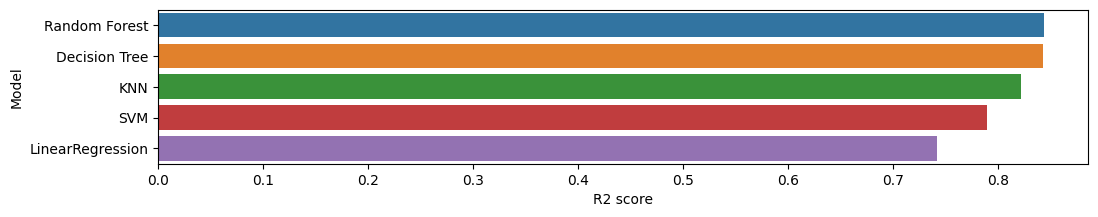

In [763]:
plt.figure(figsize=(12,2))
model_summary.sort_values(by=['R2'], ascending=False, inplace=True)
sns.barplot(x='R2', y='Model',data = model_summary)
plt.xlabel('R2 score')
plt.ylabel('Model')
plt.show()


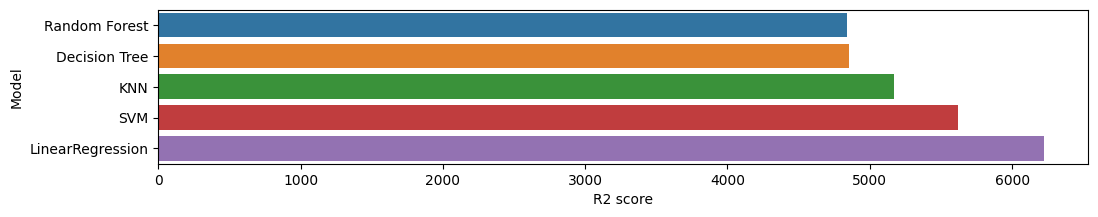

In [764]:
plt.figure(figsize=(12,2))
model_summary.sort_values(by=['RMSE'], inplace=True)
sns.barplot(x='RMSE', y='Model',data = model_summary)
plt.xlabel('R2 score')
plt.ylabel('Model')
plt.show()

# Among all models, RandomForest has given best RMSE and R^2. Therefore we will build final model using RandomForest.

In [767]:
#Predicting health insurance cost with best model
best_rf=RandomForestRegressor(criterion='friedman_mse',max_depth = 5)
best_rf.fit(X_train,y_train)
y_test_predic = best_rf.predict(X_test)

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
final_values.sample(10)

,Actual values,Predicted values
379,27000.98473,15285.169578
495,1967.02270,2695.585440
931,6238.29800,7055.947414
1139,36898.73308,35375.456596
0,16884.92400,17861.455895
182,4005.42250,5776.400622
1060,1981.58190,5258.675002
996,7418.52200,7924.431759
758,5428.72770,5962.012223
768,14319.03100,14537.330190
